In [12]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()


In [13]:
data = [
    ('Apples', 10, 2.5),
    ('Bananas', 8, 1.5),
    ('Oranges', 12, 3.0),
    ('Mangoes', 5, 4.0),
    ('Grapes', 15, 2.8),
    ('Pineapples', 7, 5.0),
    ('Strawberries', 9, 6.0),
    ('Watermelons', 4, 8.0),
    ('Papayas', 6, 3.5),
    ('Blueberries', 11, 7.5),
    ('Cherries', 10, 5.5),
    ('Guavas', 13, 2.2)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

In [14]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


In [15]:
import pandas as pd
df = pd.read_sql_query(query, conn)
print(df)


         product  total_qty  revenue
0         Apples         10     25.0
1        Bananas          8     12.0
2    Blueberries         11     82.5
3       Cherries         10     55.0
4         Grapes         15     42.0
5         Guavas         13     28.6
6        Mangoes          5     20.0
7        Oranges         12     36.0
8        Papayas          6     21.0
9     Pineapples          7     35.0
10  Strawberries          9     54.0
11   Watermelons          4     32.0


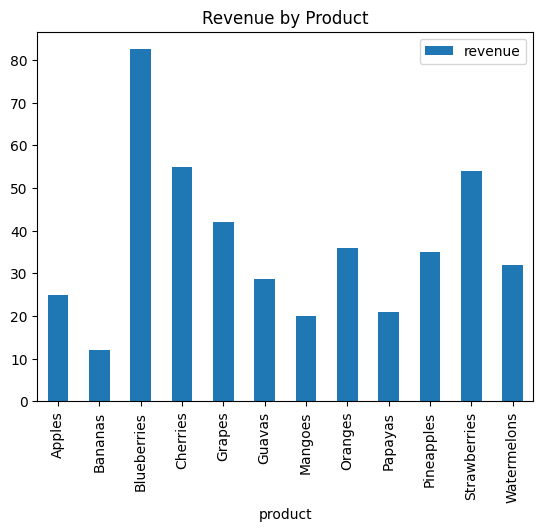

In [16]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product')
plt.savefig("sales_chart.png")
plt.show()


In [17]:
conn.close()
